<h2><center>MSIN0097 Predictive Analytics Individual Coursework</center></h2>
<center>Candidate Number : BTRS4</center>
<center>Word Count : 1998 (excluding references and tables) </center>
<center>Github Link : 'https://github.com/jyotiNayyar/Predictive_Individual_Assignment/blob/main/MSIN0097_Individual_Assignment.ipynb'</center>

# Table of Contents


* [1. Research Question](#1.-Research-Question)
* [2. Introduction](#2.-Introduction)
    * [2.1 Background](#2.1-Background)
* [3. Load Data](#3.-Load-the-Data)
* [4. Data Exploratory Analysis](#4.-Data-Exploratory-Analysis)
    * [4.1 Data Preprocessing](#4.1-Data-Preprocessing)
    * [4.2 Analysing relationship between review length and Rating](#4.2-Analysing-relationship-between-review-length-and-Rating)
    * [4.3 Analysing most common words across ratings](#4.3-Analysing-most-common-words-across-ratings)
* [5. Modelling](#5.-Modelling)
    * [5.1 LSTM (Long Short-Term Memory) model using Keras](#5.1-LSTM-model-using-Keras)
    * [5.2 Fine tuning BERT (Bidirectional Encoder Representations from Transformers) with Keras](#5.2-Fine-tuning-BERT-with-Keras)
* [6. Conclusion](#6.-Conclusion)
* [7. Limitations](#7.-Limitations)
* [8. Further Research](#8.-Further-Research)
* [9. References](#9.-References)

# 1. Research Question

Can we utilise deep learning models such as Long Short-Term Memory (LSTM) and Bidirectional Encoder Representations from Transformers (BERT) to accurately identify consumer sentiments related to
electronic products based on Amazon customer reviews for the respective category?

# 2. Introduction

The e-commerce industry for electronics is rapidly growing and evolving. With the increasing popularity of online shopping, more and more consumers are turning to online marketplaces to purchase electronics products. This has led to a significant increase in the number of online electronics retailers and marketplaces, such as Amazon, Best Buy, and Newegg. The e-commerce industry has also changed the way consumers research and purchase electronics products. Consumers can easily compare prices, read reviews, and access product information online, which has increased the level of competition among electronics retailers. A sentiment prediction model for Amazon reviews regarding electronics can help companies for electronics gain valuable insights into customer opinions and preferences. By using this information, companies can make data-driven decisions to improve their products, marketing, and customer satisfaction.

Reviews offer unbiased feedback on a product, making them highly beneficial for consumers. While ratings are typically presented as numerical values or stars, the actual text of a review holds more value. In some cases, the rating may not accurately reflect the user's experience, and the true sentiment lies in the text of the review. The objective of this project is to create a classifier that can comprehend the essence of a review and assign it an appropriate rating based on the meaning conveyed in the text.

Through this project, aim is to demonstrate the effectiveness of using deep learning models such as Long Short-Term Memory (LSTM) and Bidirectional Encoder Representations from Transformers (BERT) for sentiment analysis of Amazon electronic reviews. The insights gained from this project could be useful for businesses that want to analyze customer feedback to improve their products and services.

# 2.1 Background

The use of sentiment analysis to gain insights by analaysing textual customer feedback has been an active area of research for many years, and its applications in various fields, including e-commerce and customer service, have been widely explored. With the rise of online shopping and the prevalence of customer reviews, sentiment analysis of electronic products has gained particular attention.

Deep learning techniques such as LSTM and BERT have shown remarkable performance in various NLP tasks, including sentiment analysis. LSTM is a type of RNN that is capable of capturing the long-term dependencies in sequential data, making it well-suited for text classification tasks. In recent years, several studies have explored the use of LSTM in sentiment analysis of customer reviews in different domains, including electronics. For instance, a study by Zhu et al. (2018) used LSTM to classify Amazon reviews of mobile phones, achieving high accuracy and F1 score.

BERT, a pre-trained transformer-based model, has also shown impressive performance in various NLP tasks, including sentiment analysis. Its ability to capture the context and meaning of a piece of text has made it a popular choice for sentiment analysis of customer reviews.

Overall, the literature background suggests that deep learning techniques, particularly LSTM and BERT, have shown impressive performance in sentiment analysis of customer reviews in different domains, including electronics. Though there are ample existing models for review analysis, it is of great value to explore further or investigate more extensively and train the deep learning models for the exact domain one is interested in. This is a promising approach to provide valuable insights into customer opinions and preferences for the repective domain.

## Setup

This section imports the packages required throughout the analysis.

In [374]:
import warnings
warnings.filterwarnings("ignore")

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix

import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet, stopwords
#stop_words = stopwords.words("english")
from nltk.probability import FreqDist

from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [376]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.11.0


In [415]:
# Imports for LSTM
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping

# Imports for BERT
from transformers import BertTokenizer
from tqdm.auto import tqdm
from transformers import TFBertModel

In [377]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 3. Load the Data

The Amazon reviews dataset for Electronics consists of over 3 million reviews. 

Dataset source - 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz'

The dataset has 15 columns, detailing the information regarding a review like product and purchase detail, rating and review date. The two variables, extremely important for the analysis are 'review_body' and 'star_rating'. 'review_body' details the customer feedback and 'star_rating' details the rating submitted by the customer on a scale of 1 to 5, 5 being the highest and 1 being the lowest. The 'reveiw_body' is analysed and sentiment predicted is compared to the corresponding 'star_rating', used as label. 

In [378]:
df = pd.read_csv("https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz", sep='\t', compression='gzip',on_bad_lines='skip')

In [379]:
# Quick look at the data
pd.set_option('max_colwidth', 1000)
df[:5]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging Dock Cradle desktop Charger for Apple IPOD Shuffle 2nd Generation MP3 Player,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,2015-08-31


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091024 entries, 0 to 3091023
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 353.7+ MB


# 4. Data Exploratory Analysis

To facilitate the analysis on the most recent reviews corresponding to the year 2015, the data is sorted on 'review_date'. Approximately 150 rows contatining missing values are dropped.

In [381]:
#sorting the reviews by latest review date
df = df.sort_values(by=['review_date'], ascending=False)
data = df[['star_rating','review_body']]
# drop any rows w/ missing values
data = data.dropna()

For the purpose of this analysis, a 5-star rating system can be seen as too complex or nuanced. By reducing the number of stars to three, it can be easier for businesses to make a decision and provide feedback. Therefore I group 'star_rating', '1' and '2' as '0' depicting negative sentiment , '3' is renamed to '1' depicting neutral sentiment, '4' and '5' are grouped into '2' depicting positive sentiment.

In [382]:
# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return 0 #negative
    elif stars_received == 3:
        return 1 #neutral
    else:
        return 2 #positive
    
# Mapping stars to sentiment into three categories
data['star_rating_v1'] = [ map_sentiment(x) for x in data['star_rating']]

As the dataset is not balanced across the 3 rating groups, 45000 reviews corresponding to each sentiment are utilised to create a balanced dataset for analysis.

In [383]:
data.star_rating_v1.value_counts()

2    2315719
0     536833
1     238384
Name: star_rating_v1, dtype: int64

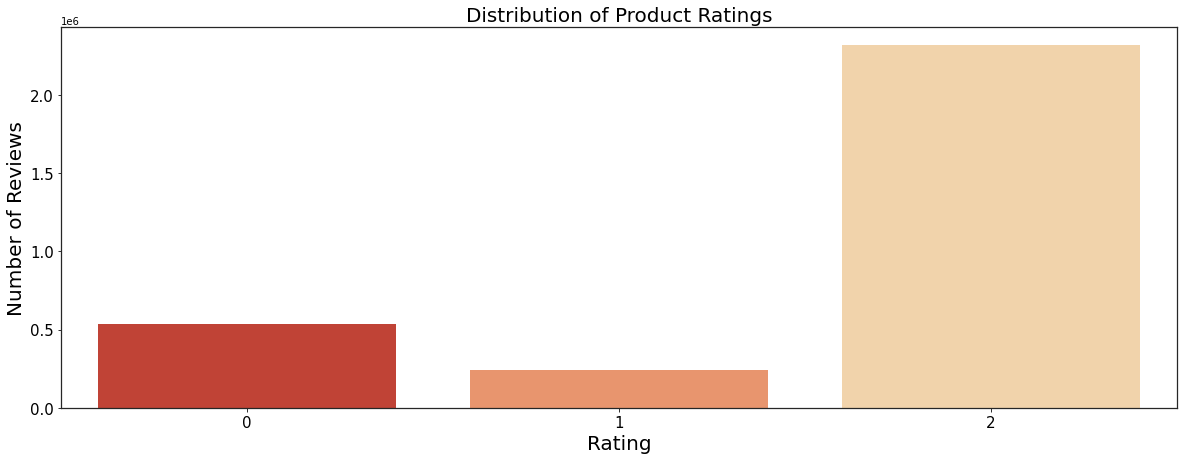

In [384]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=data["star_rating_v1"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [385]:
# set sample size to labels w/ minimum count
sample_size = 45000
data_balanced = pd.DataFrame()
for i in data.star_rating_v1.unique():
    X = data[data.star_rating_v1 == i].sample(sample_size)
    data_balanced = data_balanced.append(X)

# 4.1 Data Preprocessing

To analyse the reviews, they are preprocessed through the following steps to remove information that is not important for analysis.

1. <b>Text Normalisation:</b> All the text in 'review_body' is converted to lowercase and all non-alphanumeric characters are removed. 
2. <b>Removing Stop Words and HTML tags:</b> Using NLTK library all stopwords and HTML tags with the help of regex expressions are removed.
3. <b>Lemmatization:</b> Lemmatization is a natural language processing technique that involves reducing words to their base or dictionary form, which is known as the "lemma". The process involves identifying the base form of a word, which is also known as the root word, and converting it into a standardized form that can be used for analysis and processing. NLTK library is used for this process.

In [386]:
stopwords_list = stopwords.words('english')

def ReviewProcessing(df):
    # remove non alphanumeric 
    df['review_cleaned'] = df.review_body.str.replace('[^a-zA-Z0-9 ]', '')
    
    #remove html tags
    df['review_cleaned'] = df.review_cleaned.str.replace(r'<[^<>]*>', '', regex=True)
    df['review_cleaned'] = df.review_cleaned.str.replace('br', '')
    
    # lowercase
    df.review_cleaned = df.review_cleaned.str.lower()
    
    # split into list
    df.review_cleaned = df.review_cleaned.str.split(' ')
    
    # remove stopwords
    df.review_cleaned = df.review_cleaned.apply(lambda x: [item for item in x if item not in stopwords_list])
    return df

In [387]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = nltk.stem.WordNetLemmatizer()

def get_lemmatize(sent):
    return " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sent)])

In [388]:
clean_data = ReviewProcessing(data_balanced)
clean_data.review_cleaned = clean_data.review_cleaned.apply(' '.join)
clean_data['review_cleaned_lemmatized'] = clean_data.review_cleaned.apply(get_lemmatize)

In [389]:
#dropping rows where review_cleaned_lemmatized is empty string
clean_data['review_cleaned_lemmatized'].replace('', np.nan, inplace=True)
clean_data.dropna(subset=['review_cleaned_lemmatized'], inplace=True)

# 4.2 Analysing relationship between review length and Rating

This section analyses the relationship between the length of the review i.e. the word count of the review with the sentiment or star rating submitted for the review.

In [390]:
#calculating word count per review
clean_data['word_count'] = clean_data['review_cleaned_lemmatized'].str.split().str.len()

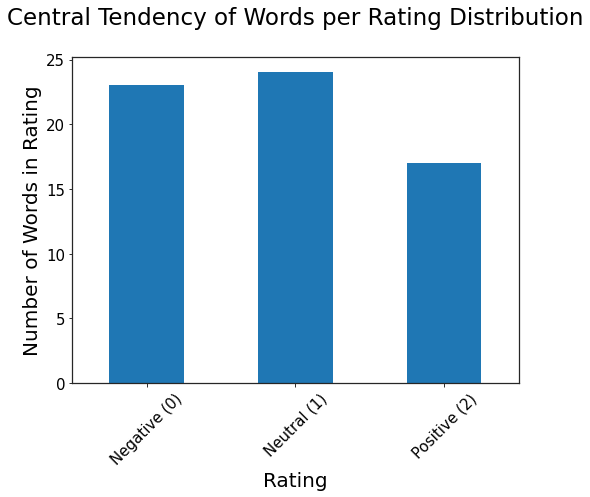

In [391]:
#Analysing centeral tendency of words per rating distribution
letter_avg = clean_data.groupby('star_rating_v1')['word_count'].median().plot(kind='bar', figsize=(8,6))
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Number of Words in Rating', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Central Tendency of Words per Rating Distribution\n',fontsize=23)
ax = plt.gca()
ax.set_xticklabels(['Negative (0)','Neutral (1)','Positive (2)'], rotation = 45)
plt.show()

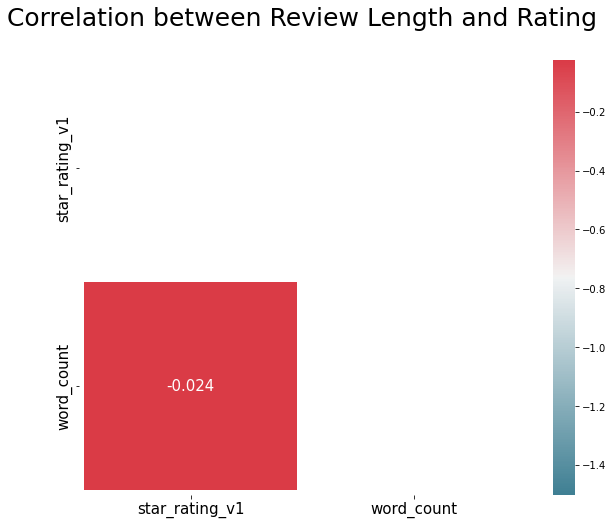

In [392]:
#Analysing correlation between review length and star-rating
correlation = clean_data[['star_rating_v1', 'word_count']].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation between Review Length and Rating\n',fontsize=25)
sns.heatmap(correlation, cmap=cmap, annot=True, annot_kws={"size": 15}, linewidths=10, vmin=-1.5, mask=mask);

The graph 'Central Tendency of Words per Rating Distribution', shows that the average number of words for a positive review are less in comparison to negative and neutral reviews. It can be inferred that happy customers tend to submit shorter reviews or feedbacks. Also looking at the correlation matrix 'Correlation between Review Length and Rating', the correlation between word count of a review and star rating is negative i.e. '-0.024'. Therefore, it can be established that there is an inverse relationship between review length and star rating. Shorter the review, more positive the customer feedback is.

# 4.3 Analysing most common words across ratings

This section analyses the most common words used overall and across positive (2) and negative (0) star-ratings.

In [254]:
# Collecting all words used in reviews.
words = clean_data['review_cleaned_lemmatized'].str.split(' ')
allwords = []
for wordlist in words:
    allwords += wordlist

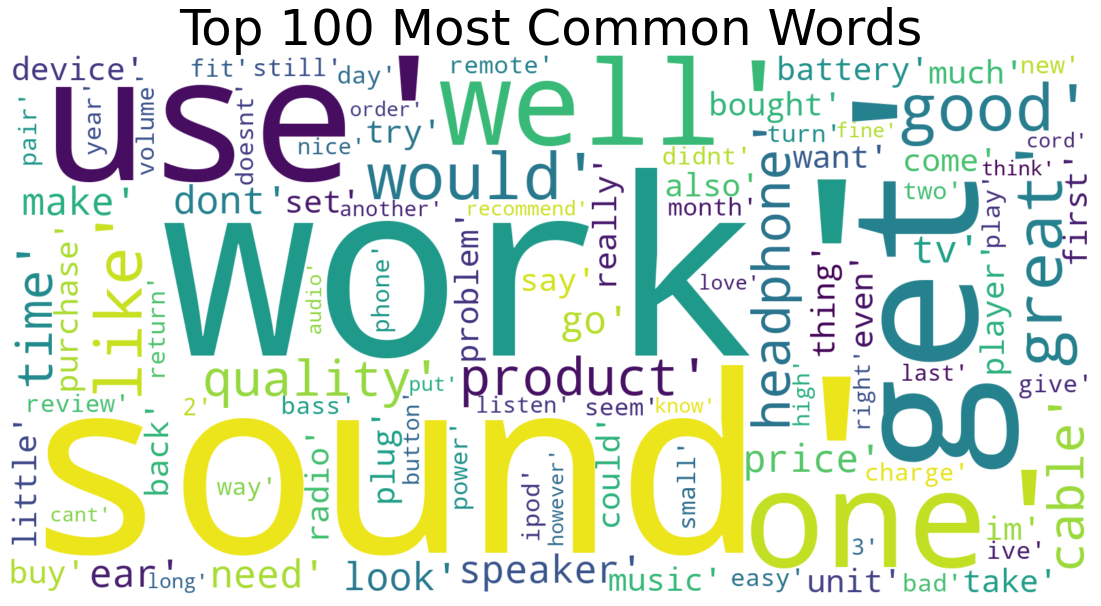

In [262]:
# Creating word cloud of top 100 most common words used in the reviews.
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
# plt.tight_layout(pad=0)
plt.show()

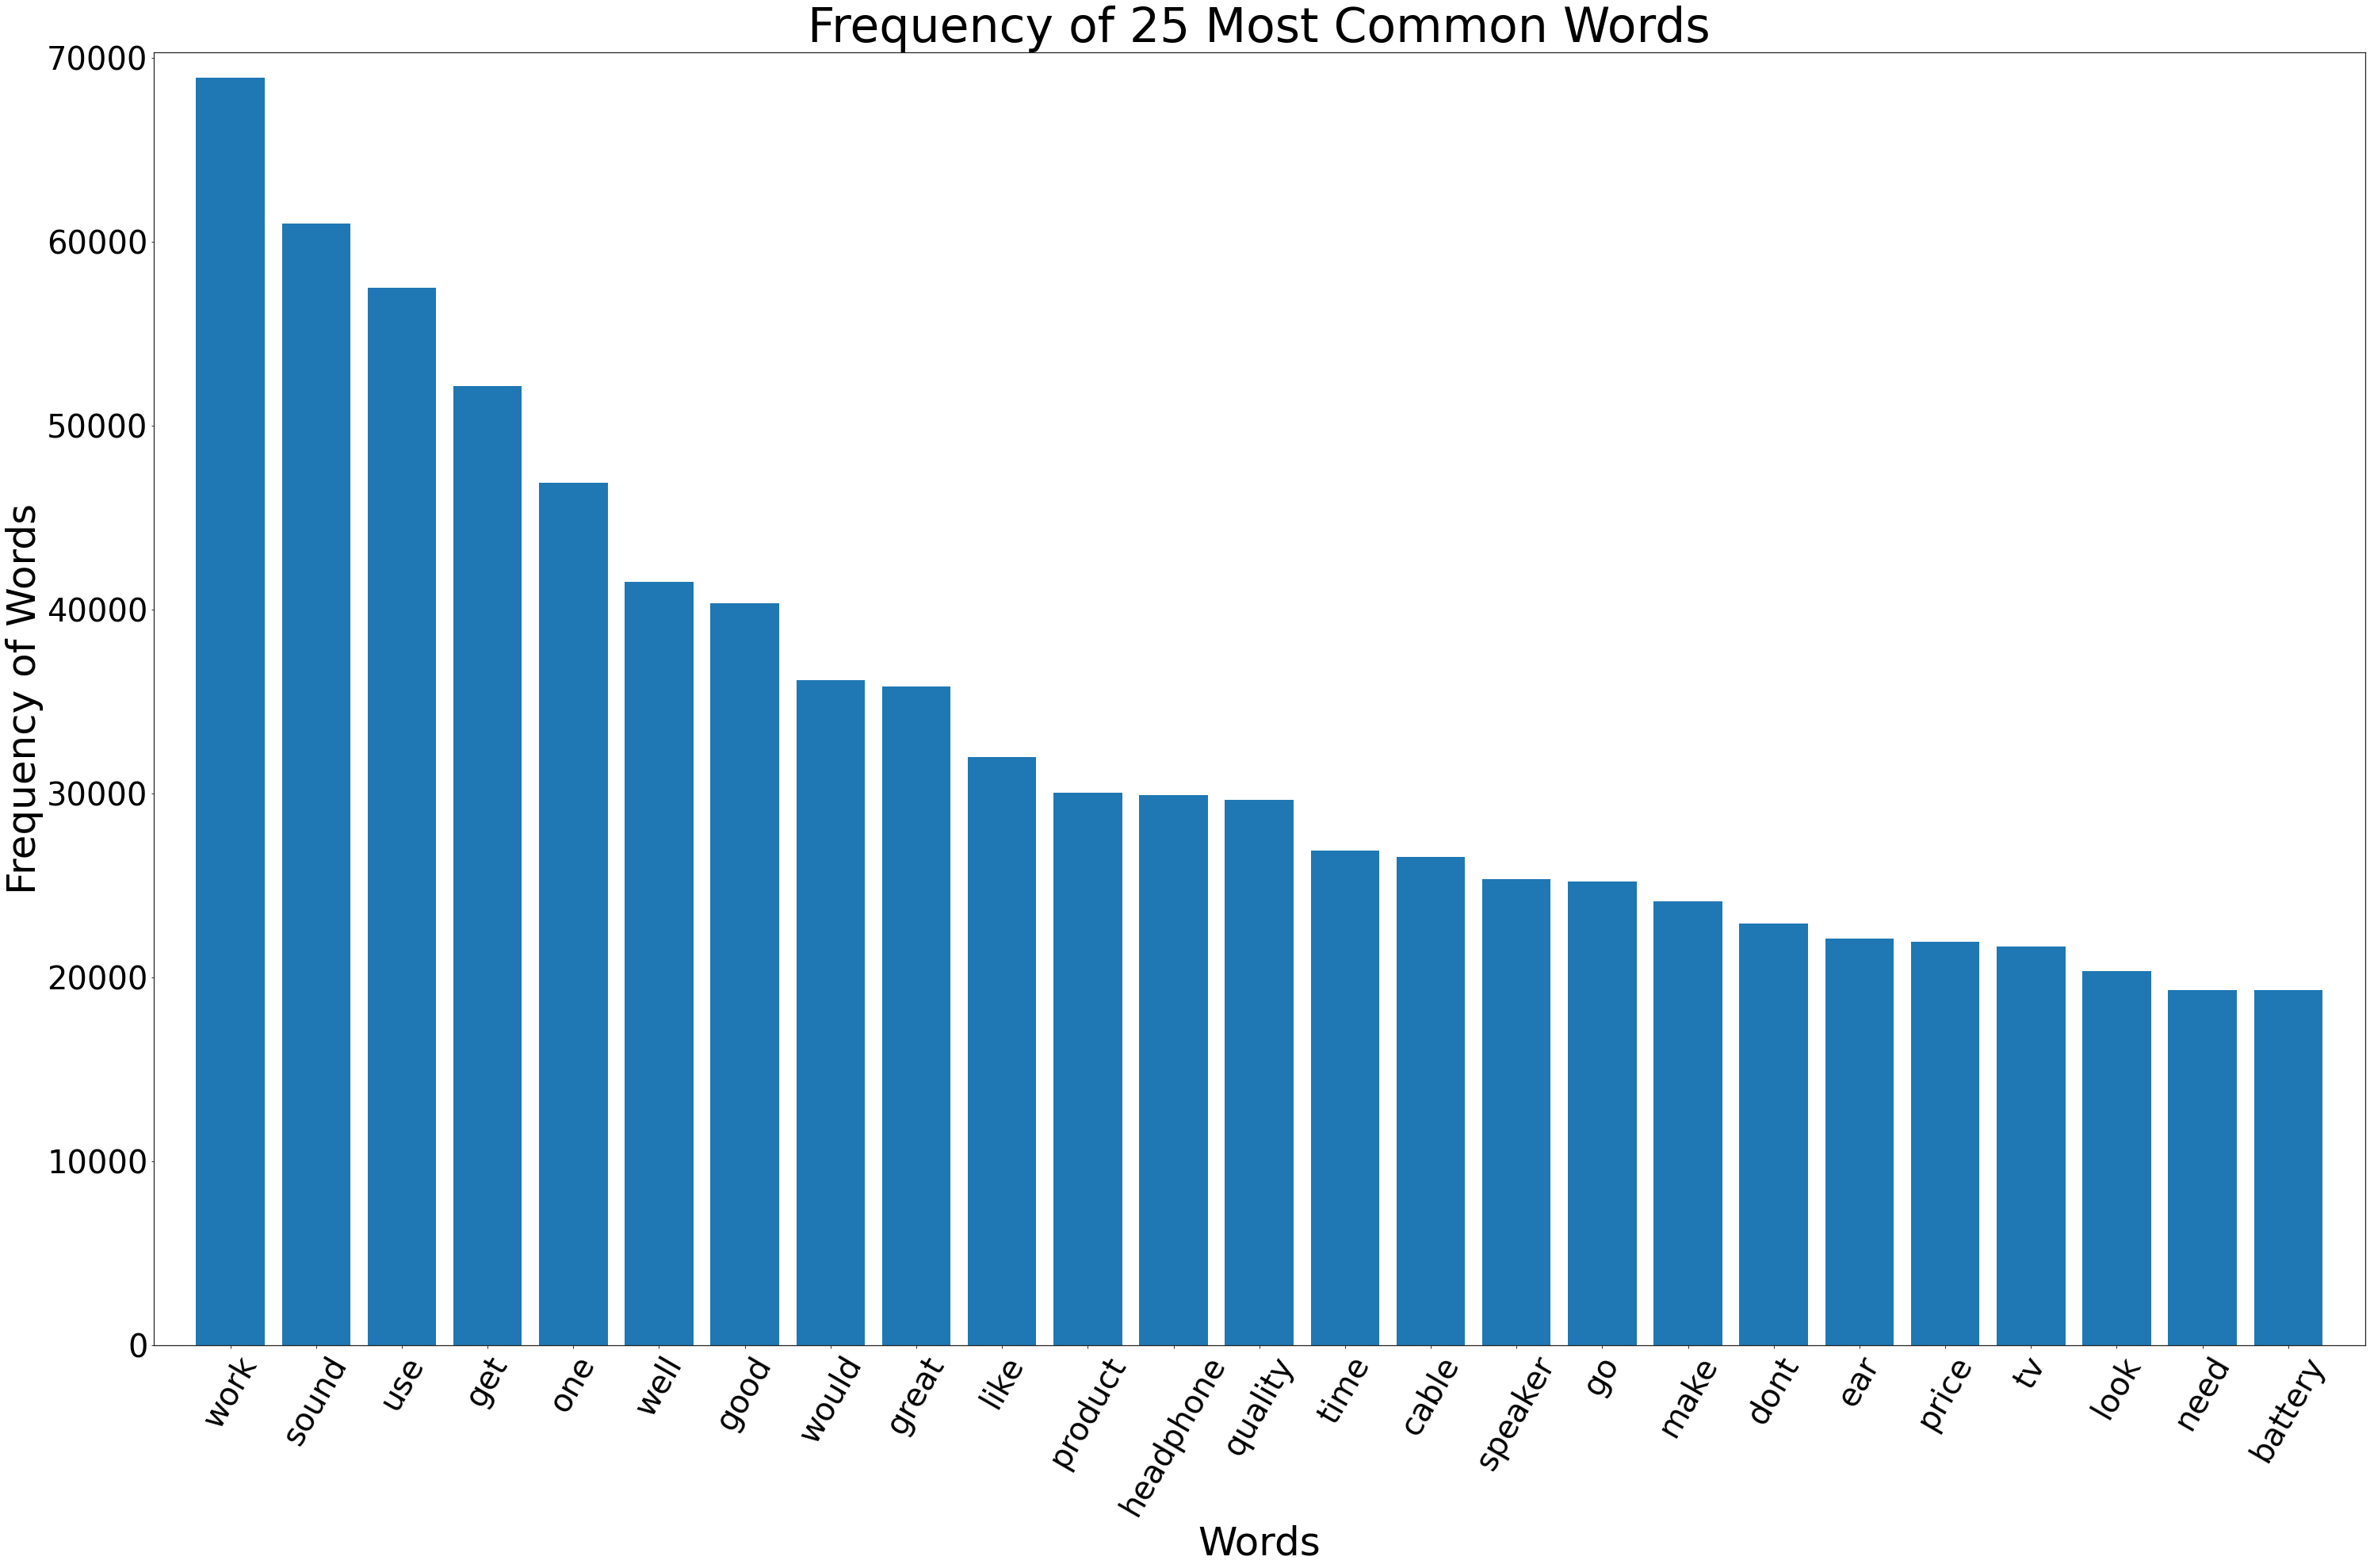

In [263]:
# Analysing frequency of 25 most common words.
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

The results through 'Top 100 Most Common Words' and 'Frequency of 25 Most Common Words' graphs, certainly supports the overall positive sentiment of the reviews. Terms such as “great”, “work”, “good”, “well” point to a positive customer feedback on electronics sold by Amazon. Therefore it might be worthwile to delve deeper and analyse the frequent words across positive and negative reviews.

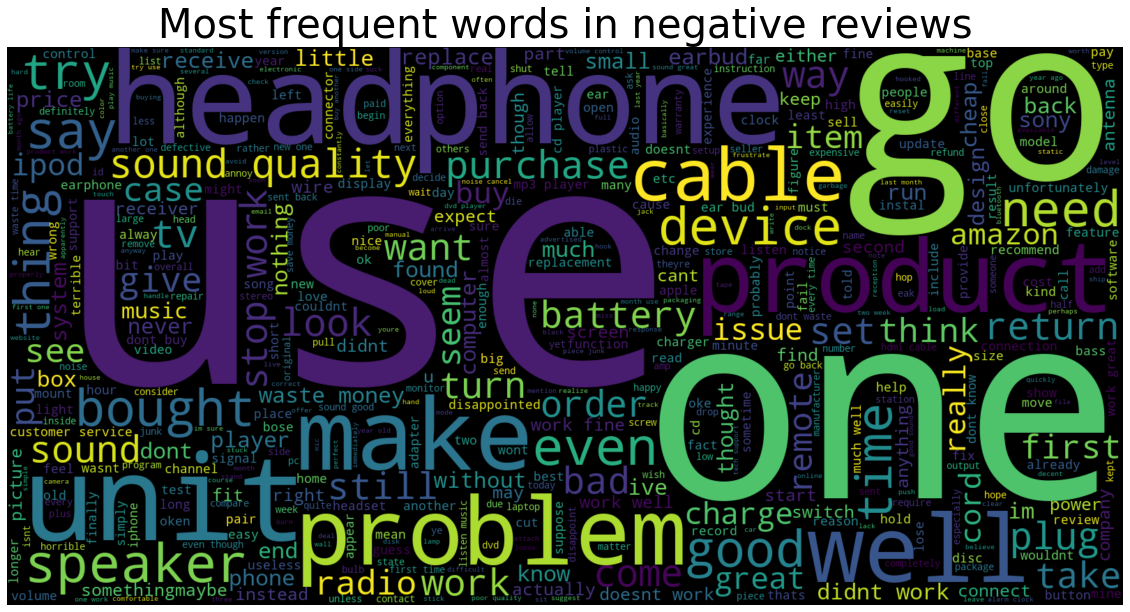

In [268]:
# Creating word cloud for most common words used in the negative reviews.
neg_reviews = clean_data[clean_data.star_rating_v1==0]['review_cleaned_lemmatized']
text = ' '.join([word for word in neg_reviews])
plt.figure(figsize=(20,15), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize=40)
plt.show()

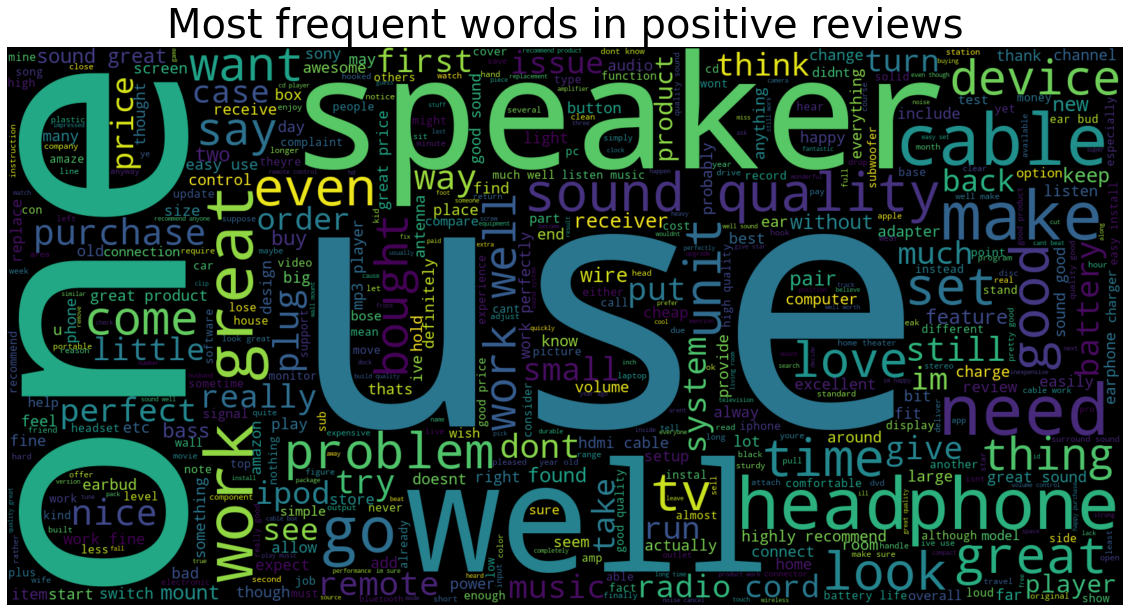

In [270]:
# Creating word cloud for most common words used in the positive reviews.
pos_reviews = clean_data[clean_data.star_rating_v1==2]['review_cleaned_lemmatized']
text = ' '.join([word for word in pos_reviews])
plt.figure(figsize=(20,15), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=40)
plt.show()

Through analysing the word clouds for positive and negative reviews, it can be inferred that the word 'use' appears in both the review types. It depicts that the usage or utility of the electronic products is paramount for the customers. Also, the presence of words like 'speaker','headphone' and 'tv' in word clouds for both the review types, shows that these are the major electronic devices purchased through Amazon. Additionally, in word cloud for negative reviews, words like 'problem', 'return' and 'issues' can be seen showing dissatisfaction among customers.

# 5. Modelling

This section focuses on the training of deep learning models - Long Short-Term Memory (LSTM) and Bidirectional Encoder Representations from Transformers (BERT).

1. <b>LSTM:</b> LSTM stands for Long Short-Term Memory, and it is a type of recurrent neural network (RNN) used in the field of deep learning for natural language processing and other sequential data analysis tasks.LSTM is designed to overcome some of the limitations of traditional RNNs, which tend to suffer from the vanishing gradient problem, where the gradient used to update the weights during training can become extremely small, making it difficult for the network to learn from long-term dependencies in the data. LSTMs are designed to overcome this problem by incorporating a memory cell, which allows the network to selectively retain or forget information over time, making them particularly effective for tasks that involve processing sequences of data.
2. <b>Fine-tuning BERT:</b> BERT is a powerful deep learning algorithm that has been pre-trained on large amounts of text data, making it an effective tool for a variety of language processing tasks, including text classification, question answering, and natural language understanding. Fine-tuning BERT involves taking a pre-trained BERT model and training it on a smaller dataset specific to a particular task. This involves adding a few additional layers to the pre-trained model and training it on a smaller set of labeled data that is specific to the task at hand. The fine-tuning process enables the BERT model to learn the specific patterns and features of the new task, which can improve its performance on the specific task.

<b> Model Evaluation </b>
To evaluate the performance of different models, accuracy score and confusion matrices are used. 
1. <b>Accuracy Score:</b> The accuracy score is a measure of how well a machine learning model is able to correctly predict the target variable or label for a given set of input data. It is defined as the ratio of the number of correct predictions made by the model to the total number of predictions made, expressed as a percentage. 
2. <b>Confusion Matrix:</b> A confusion matrix is a table that is often used to evaluate the performance of a machine learning model by comparing the predicted values to the actual values. It is a matrix with rows and columns that represent the predicted and actual classes or categories, respectively.

# 5.1 LSTM model using Keras

This section focuses on training LSTM model using Keras. Tokenizer from keras is used to convert text in reviews to a sequence that can be input to the model. The labels are one-hot encoded for modelling.

In [393]:
x = (data_balanced['review_body']).to_frame(name='review_body')
y = (data_balanced['star_rating_v1']).to_frame(name='star_rating_v1')

In [394]:
#one-hot encode labels
def encodeLabels(labels_input):
    labels = np.zeros((len(labels_input), 3))
    labels[np.arange(len(labels_input)), labels_input.values] = 1
    return labels

In [395]:
#Tokenize review text
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(x['review_body'].values)
sequences = tokenizer.texts_to_sequences(x['review_body'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 76844 unique tokens.


In [396]:
labels = encodeLabels(y['star_rating_v1'])

The dataset is split into train, validation and test sets (60%:20%:20%).

<b>Training set:</b> The training set is used to train the machine learning model. The model learns the patterns and relationships between input features and output labels. The goal of the training set is to optimize the model's parameters and learn the underlying patterns in the data.

<b>Validation set:</b> The validation set is used to evaluate the performance of the model during the training phase. The model is not allowed to use this data to adjust its parameters, instead the validation set is used to estimate the generalization error of the model and to tune the model's hyperparameters.

<b>Test set:</b> The test set is a set of unseen data that is used to evaluate the final performance of the machine learning model. This dataset is used to estimate how well the model will perform on new, unseen data in the future. The model is evaluated on the test set only after it has been completely trained and fine-tuned on the training and validation sets.



In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, 
                                                    test_size=0.2, stratify=y, random_state = 44)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=44)

A 4-layered LSTM model is trained for 20 epochs with early stopping. The goal of early stopping is to stop the training process before the model becomes too complex and starts to overfit the training data. The training process can be stopped early, and the model with the lowest validation loss can be used as the final model. Since it is a multi-class classification problem, activation function is selected as 'softmax' and loss as 'categorical_crossentropy'.


In [398]:
epochs = 20
emb_dim = 128
batch_size = 256
labels[:2]

array([[0., 0., 1.],
       [0., 0., 1.]])

In [399]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

((80937, 130), (80937, 3), (26979, 130), (26979, 3))
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 130, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,073,603
Trainable params: 1,073,603
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
317/317 [==============================] 

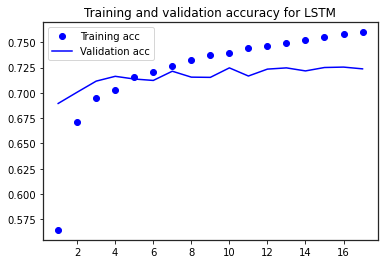

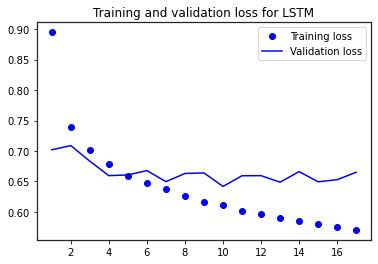

In [400]:
# Analysing Training and Validation loss and accuracy.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for LSTM')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for LSTM')
plt.legend()

plt.show()

<b>The LSTM model gives a validation accuracy score of 72.37% after training for 17 epochs.</b>

In [401]:
# Get the model predictions
def predict(X):
    probabilities = model.predict(X)
    predictions = [np.argmax(prob) for prob in probabilities]
    return predictions

In [402]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

844/844 [==============================] - 10s 12ms/step - loss: 0.6618 - acc: 0.7252
Test set
  Loss: 0.662
  Accuracy: 0.725


<b>The LSTM model gives an accuracy score of 72.5% on the test set.</b>

In [413]:
# Analysing the confusion matrix for LSTM model on the test set.
def plot_confusion_matrix(cm, classes, ax, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues, set_y_label = True):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    # Add the labels
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set(yticks=[0,1,2], 
            xticks=[0, 1, 2], 
           yticklabels=classes, 
           xticklabels=classes)
    #ax.yaxis.set_major_locator(matplotlib.ticker.IndexLocator(base=1, offset=0.5))
    ax.xaxis.label.set_size(10)
    ax.yaxis.label.set_size(10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    if title:
        ax.set_title(title,fontsize=15)
    if(set_y_label):
      ax.set_ylabel('Ground truth label')
    ax.set_xlabel('Predicted label')

844/844 [==============================] - 10s 11ms/step


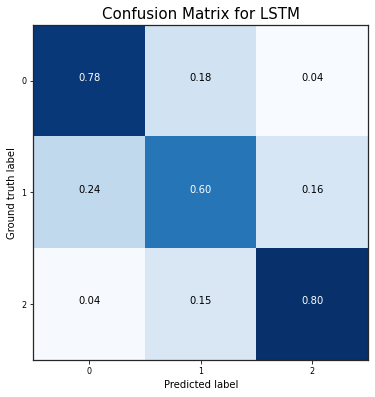

In [414]:
# Plot the confusion matrix
y_test_label = [np.argmax(prob) for prob in y_test]
cm = confusion_matrix(y_test_label, predict(X_test))

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 10))
plot_confusion_matrix(cm, ("0", "1","2"), ax, normalize=True, title='Confusion Matrix for LSTM')

Evaluating the performance of LSTM model on the amazon reviews dataset for electronics, it can be inferred that the model is able to give a considerably good accuracy score of approximately 72% on validation and test set. Through the confusion matrix above, it can be inferred that the model does considerably well in predicting the positive and negative sentiments, but the performance on prediction of neutral reviews can be improved further.

# 5.2 Fine tuning BERT with Keras

This section focusses on fine-tuning BERT (transformer model), to achieve a model with higher prediction accuracy as compared to LSTM. BERT is a pre-trained model that has been trained on a large corpus of text, which allows it to learn general language representations. This pre-training gives BERT a significant advantage over LSTM models, which typically require a large amount of labeled data to learn effective representations.

Since training a fine-tuned BERT model is computationally expensive, i.e. it requires a lot of computational sources and training time, I have trained the model on a smaller subset as compared to LSTM. 4000 reviews corresponding to each star rating are used to create a balanced dataset of total 12000 rows for training. 'BertTokenizer' is used to tokenise the text in reviews which further acts as an input to the model. The labels are one-hot encoded for modelling.

In [416]:
# Creating a smaller balanced data subset for training.
sample_size = 4000
data_balanced_bert = pd.DataFrame()
for i in data.star_rating_v1.unique():
    X = data[data.star_rating_v1 == i].sample(sample_size)
    data_balanced_bert = data_balanced_bert.append(X)
    
x_bert = (data_balanced_bert['review_body']).to_frame(name='review_body')
y_bert = (data_balanced_bert['star_rating_v1']).to_frame(name='star_rating_v1')

The dataset is split into train, validation and test sets in the ratio - (60%:20%:20%).

In [417]:
X_train_bert,X_test_bert, y_train_bert, y_test_bert = train_test_split(x_bert, y_bert, 
                                                    test_size=0.2, stratify=y_bert, random_state = 44)
X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(X_train_bert, y_train_bert, test_size=0.25, stratify=y_train_bert, random_state=44)

In [418]:
# Initialising Bert Tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [419]:
# Tokenizing Reviews for input to the model.
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['review_body'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [420]:
# Tokenizing Train Reviews for input to the model.
X_train_input_ids = np.zeros((len(X_train_bert),256))
X_train_attn_masks = np.zeros((len(X_train_bert),256))

X_train_input_ids, X_train_attn_masks = generate_training_data(X_train_bert, X_train_input_ids, X_train_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [421]:
# Tokenizing Validation Reviews for input to the model.
X_val_input_ids = np.zeros((len(X_val_bert),256))
X_val_attn_masks = np.zeros((len(X_val_bert),256))

X_val_input_ids, X_val_attn_masks = generate_training_data(X_val_bert, X_val_input_ids, X_val_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [422]:
# Tokenizing Test Reviews for input to the model.
X_test_input_ids = np.zeros((len(X_test_bert),256))
X_test_attn_masks = np.zeros((len(X_test_bert),256))

X_test_input_ids, X_test_attn_masks = generate_training_data(X_test_bert, X_test_input_ids, X_test_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [423]:
# one-hot encoded Train labels
labels_train_bert = np.zeros((len(y_train_bert), 3))
labels_train_bert[np.arange(len(y_train_bert)), y_train_bert['star_rating_v1'].values] = 1

In [424]:
# one-hot encoded Validation labels
labels_val_bert = np.zeros((len(y_val_bert), 3))
labels_val_bert[np.arange(len(y_val_bert)), y_val_bert['star_rating_v1'].values] = 1

In [425]:
# one-hot encoded Test labels
labels_test_bert = np.zeros((len(y_test_bert), 3))
labels_test_bert[np.arange(len(y_test_bert)), y_test_bert['star_rating_v1'].values] = 1

In [426]:
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_input_ids, X_train_attn_masks, labels_train_bert))
dataset_val = tf.data.Dataset.from_tensor_slices((X_val_input_ids, X_val_attn_masks, labels_val_bert))

In [427]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels
dataset_train = dataset_train.map(SentimentDatasetMapFunction)
dataset_val = dataset_val.map(SentimentDatasetMapFunction)

A model with 2 input layers for input_ids and attention_mask, one main layer for BERT, an intermediate layer and one output layer is trained for only 1 epoch. I could not train further than 1 epoch due to computational limitations. Since it is a multi-class classification problem, activation function is selected as 'softmax' and loss as 'categorical_crossentropy'.

In [428]:
model_bert = TFBertModel.from_pretrained('bert-base-cased') 

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [429]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model_bert.bert(input_ids, attention_mask=attn_masks)[1]
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(3, activation='softmax', name='output_layer')(intermediate_layer)

sentiment_model_bert = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model_bert.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                         

In [430]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [431]:
sentiment_model_bert.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [432]:
dataset_train = dataset_train.shuffle(10000).batch(16, drop_remainder=True) 
dataset_val = dataset_val.shuffle(10000).batch(16, drop_remainder=True) 

hist_bert = sentiment_model_bert.fit(
    dataset_train,
    validation_data=dataset_val,
    epochs=1
)

450/450 [==============================] - 7228s 16s/step - loss: 0.7307 - accuracy: 0.6657 - val_loss: 0.6165 - val_accuracy: 0.7283


<b> Fine-tuning the BERT model gives a validation accuracy score of 72.8% after training for just 1 epoch. Even though it is a very marginal increase in accuracy but the model is trained for just 1 epoch in comparison to 17 epochs taken by LSTM and also on a relatively smaller dataset. </b>

In [433]:
sentiment_model_bert.save('sentiment_model_bert')

INFO:tensorflow:Assets written to: sentiment_model_bert/assets


INFO:tensorflow:Assets written to: sentiment_model_bert/assets


In [436]:
accr = sentiment_model_bert.evaluate({'input_ids':X_test_input_ids,'attention_mask':X_test_attn_masks},labels_test_bert)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

75/75 [==============================] - 693s 9s/step - loss: 0.6007 - accuracy: 0.7329
Test set
  Loss: 0.601
  Accuracy: 0.733


In [438]:
predicted_test_bert = sentiment_model_bert.predict({'input_ids':X_test_input_ids,'attention_mask':X_test_attn_masks})
y_predicted_test_bert = np.argmax(predicted_test_bert, axis = 1)


75/75 [==============================] - 710s 9s/step


<b> Fine-tuning the BERT model gives an accuracy score of 73.3% on the test set.</b>

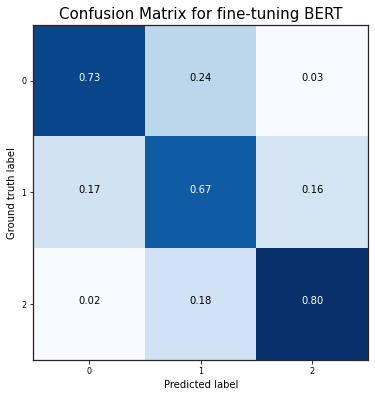

In [440]:
# Plot the confusion matrix
cm = confusion_matrix(y_test_bert, y_predicted_test_bert)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 10))
plot_confusion_matrix(cm, ("0", "1","2"), ax, normalize=True,title='Confusion Matrix for fine-tuning BERT')

Evaluating the performance of the above model, fine-tuning BERT on the amazon reviews dataset for electronics, it can be inferred that the model is able to give a considerably good accuracy score of approximately 72.8% on validation set and 73.3% on test set. Also, this model is able to achieve a comparable accuracy score to LSTM with a relatively smaller dataset and just 1 epoch of training. Through the confusion matrix above, it can be inferred that the model does considerably well in predicting the positive and negative sentiments, but the performance on prediction of neutral reviews can be improved further. But, BERT is able to help in predicting neutral reviews with a considerably higher accuracy as compared to LSTM.

# 6. Conclusion

According to the above study, fine-tuning BERT, a transformer model, yields slightly better results than using the LSTM model. The accuracy score on test set i.e. accuracy for predicting the sentiments of reviews which the models were seeing for the first time, was higher for BERT by approximately 1%. Due to limited computational resources, considering that the dataset used for fine-tuning BERT is relatively small and the model is trained for just 1 epoch, fine-tuning BERT gave better results . However, in situations where computational resources and training time are limited, Amazon could consider using the LSTM model to analyze and predict customer review sentiment, and thereby make informed decisions to enhance its products and services. On the other hand, if sufficient computational resources and model training time are available, fine-tuning BERT on a larger dataset and more number of epochs can provide greater prediction accuracy and be used instead of LSTM.

# 7. Limitations

Due to restricted computational resources and training time, BERT was trained on a mere 12,000 instances for just 1 epoch, which may have hindered the model's ability to attain even greater prediction accuracy. However, with sufficient computational resources, it is possible to scale up the training of the model using BERT to a larger dataset and more epochs, resulting in superior outcomes.

# 8. Further Research

While the above sentiment analysis approach is useful for determining the general sentiment of customer reviews, it does not differentiate between specific factors such as pricing, quality, customer service, and shipping. To gain a more comprehensive understanding of customer sentiment, an aspect-based sentiment analysis can be employed. This approach is a more detailed form of opinion mining that identifies and evaluates sentiment towards distinct aspects. For instance, if a review of an electronic product contains positive remarks about the utility of a product but negative remarks about the delivery service, aspect-based sentiment analysis can effectively detect and categorize these sentiments, leading to a more accurate sentiment analysis and more focused improvements.

# 9. References

Theartificialguy. (2021). NLP-with-Deep-Learning/multi_class.ipynb at master
    theartificialguy/NLP-with-Deep-Learning. [online] GitHub. Available at:
    https://github.com/theartificialguy/NLP-with-Deep-Learning/blob/master/BERT/Multi-Class%20classification%20TF-BERT/multi_class.ipynb (Accessed 23 Mar. 2023).

Peter Nagy.(2018). Multi class classification with LSTM
Available at: https://www.kaggle.com/code/ngyptr/multi-class-classification-with-lstm
(Accessed 24 Mar. 2023)